# Vanguard A/B Test Analysis - Isailton Soares

## Module 2 Project – EDA & Data Cleaning

**Context:**  
This analysis supports the Customer Experience (CX) team at Vanguard in evaluating a digital A/B test comparing a traditional user interface (Control) with a redesigned interface (Test).

**Objective:**  
To explore, clean, and prepare client, web interaction, and experiment data for further analysis of user behavior and process completion.

**Team:**
  - Team Name: House Tyrell
  - Team Members: Safina, Sulaiman, Charles, Isailton

# Process Flowchart

| ID | Process Step | Why (Reason & Result) | How Input (Characteristics) | How Output (Method/Feature) | Description (Method/Feature) |
|----|--------------|----------------------|----------------------------|-----------------------------|-----------------------------|
| 1  | <span style="color:blue"><b>Load datasets</b></span> | Access raw data | TXT files, correct path | pd.read_csv() | <span style="color:darkgray"><i>Reads text/csv files into DataFrame</i></span> |
| 2  | <span style="color:blue"><b>Inspect columns</b></span> | Verify structure | Check headers, column names | .columns | <span style="color:darkgray"><i>Lists all column names</i></span> |
| 3  | <span style="color:blue"><b>Fix column names</b></span> | Correct parsing | Clean, trimmed names | .str.strip() | <span style="color:darkgray"><i>Removes extra spaces from column names</i></span> |
| 4  | <span style="color:blue"><b>Merge client+exp</b></span> | Combine client info | client_id exists | pd.merge() | <span style="color:darkgray"><i>Joins two DataFrames on a key column</i></span> |
| 5  | <span style="color:blue"><b>Merge with web</b></span> | Complete dataset | client_id aligned | pd.merge() | <span style="color:darkgray"><i>Combines client info with web interactions</i></span> |
| 6  | <span style="color:blue"><b>Check missing</b></span> | Identify cleaning needs | NaN values | .isnull().sum() | <span style="color:darkgray"><i>Counts missing values in each column</i></span> |
| 7  | <span style="color:blue"><b>Summary stats</b></span> | Understand numbers | Numerical columns | .describe() | <span style="color:darkgray"><i>Generates descriptive statistics</i></span> |
| 8  | <span style="color:blue"><b>Check categories</b></span> | Verify categorical data | Gender, variation | .unique() | <span style="color:darkgray"><i>Shows unique values in a column</i></span> |
| 9  | <span style="color:blue"><b>Check process steps</b></span> | Understand flow | process_step column | .unique() | <span style="color:darkgray"><i>Identifies all process steps</i></span> |
| 10 | <span style="color:blue"><b>Convert datetime</b></span> | Time analysis ready | date_time column | pd.to_datetime() | <span style="color:darkgray"><i>Converts strings to datetime objects</i></span> |
| 11 | <span style="color:blue"><b>Save merged copy</b></span> | Backup before EDA | Full df_full | .to_csv() | <span style="color:darkgray"><i>Saves DataFrame to CSV</i></span> |
| 12 | <span style="color:blue"><b>Compute completion</b></span> | Overall KPI | Last step in process | Boolean column completed | <span style="color:darkgray"><i>Marks if client completed process</i></span> |
| 13 | <span style="color:blue"><b>Completion by grp</b></span> | Compare Control/Test | Variation column | .groupby().mean() | <span style="color:darkgray"><i>Calculates mean completion by group</i></span> |
| 14 | <span style="color:blue"><b>Visualize completion</b></span> | Quick visual insight | Completion by group | matplotlib bar chart | <span style="color:darkgray"><i>Displays bar chart of completion rates</i></span> |
| 15 | <span style="color:blue"><b>Hypothesis test</b></span> | Statistical significance | Completed, Variation columns | proportions_ztest() | <span style="color:darkgray"><i>Tests difference between two proportions</i></span> |
| 16 | <span style="color:blue"><b>Demographics KPI</b></span> | Analyze client behavior | Age, gender columns | .groupby().mean() | <span style="color:darkgray"><i>Computes completion rate by demographics</i></span> |
| 17 | <span style="color:blue"><b>Demographics viz</b></span> | Visual insight | Completion by age/gender | matplotlib bar charts | <span style="color:darkgray"><i>Bar charts to compare demographic completion</i></span> |
| 18 | <span style="color:blue"><b>Prepare Tableau</b></span> | Dashboards ready | Relevant columns | .to_csv() | <span style="color:darkgray"><i>Saves subset for Tableau dashboards</i></span> |
| 19 | <span style="color:blue"><b>Step-wise count</b></span> | Funnel visualization | process_step, client_id | .groupby().nunique() | <span style="color:darkgray"><i>Counts unique clients at each step</i></span> |
| 20 | <span style="color:blue"><b>Daily trend</b></span> | Time series visualization | date_time, completed | .groupby().mean() | <span style="color:darkgray"><i>Calculates daily completion rate</i></span> |
| 21 | <span style="color:blue"><b>Export summaries</b></span> | Presentation-ready data | Metrics, step counts, trends | .to_csv() | <span style="color:darkgray"><i>Exports summary tables for presentation</i></span> |

### Import Libraries (First Code, Very Small)
Goal: Prepare the environment to work with the data.

In [112]:
# Load needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load FIRST Dataset (Client Profiles)
Goal: Successfully load df_final_demo.txt using the correct file format.

In [113]:
# Load df_final_demo.txt 
# df_demo = pd.read_csv('../data/df_final_demo.txt', sep='|')
df_demo = pd.read_csv('../data/df_final_demo.txt', sep=',')

### Verify the Data Loaded Correctly
Goal: Make sure the first dataset (df_demo) is actually loaded and readable.

In [114]:
# Show the first 5 rows
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


### Load the Second Dataset (df_final_experiment_clients.txt)
Goal: Bring in the experiment roster so we can later link it to client data.

In [115]:
# Load df_final_experiment_clients.txt 
df_experiment = pd.read_csv('../data/df_final_experiment_clients.txt', sep=',')

In [116]:
# Show the first 5 rows
df_experiment.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


### Load the First Part of the Web Data (df_final_web_data_pt_1.txt)
Goal: Start loading the digital footprint data safely.

In [117]:
# Load df_final_web_data_pt_1.txt
df_web_1 = pd.read_csv('../data/df_final_web_data_pt_1.txt', sep=',')

In [118]:
# Show the first 5 rows
df_web_1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Load the Second Part of the Web Data (df_final_web_data_pt_2.txt)
Goal: Complete loading all raw data before merging.

In [119]:
# Load df_final_web_data_pt_2.txt
df_web_2 = pd.read_csv('../data/df_final_web_data_pt_2.txt', sep=',')

In [120]:
# Show the first 5 rows
df_web_2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


### Quick Check of Column Names
Goal: Make sure we know what columns exist in each dataset before merging or cleaning.

In [121]:
# Check columns for each dataset
print("Client Profiles columns:", df_demo.columns.tolist())
print("Experiment Roster columns:", df_experiment.columns.tolist())
print("Web Data Part 1 columns:", df_web_1.columns.tolist())
print("Web Data Part 2 columns:", df_web_2.columns.tolist())

Client Profiles columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
Experiment Roster columns: ['client_id', 'Variation']
Web Data Part 1 columns: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']
Web Data Part 2 columns: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']


### Merge the Two Web Data Parts
Goal: Combine the two parts of the digital footprint into one dataset for easier analysis.

In [122]:
# Combine the two parts in one dataframe
df_web = pd.concat([df_web_1, df_web_2], ignore_index=True)

In [123]:
# Show the first 5 rows
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [124]:
# Check number of rows
print("Number of rows in combined web data:", len(df_web))

#All raw datasets are now loaded and ready for analysis.

Number of rows in combined web data: 755405


### Check Column Names for client_id
Goal: See the exact column names in both datasets so we can merge safely.

In [125]:
# Show column names for merge
print("df_demo columns:", df_demo.columns.tolist())
print("df_experiment columns:", df_experiment.columns.tolist())

df_demo columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_experiment columns: ['client_id', 'Variation']


### Reload the datasets with the correct separator
Goal: Make df_demo and df_experiment have proper separate columns.

In [126]:
# Reload client profiles
df_demo = pd.read_csv('../data/df_final_demo.txt', sep=',')

# Reload experiment roster
df_experiment = pd.read_csv('../data/df_final_experiment_clients.txt', sep=',')

### Verify the Columns After Reload
Goal: Make sure client_id and other columns are correctly recognized.

In [127]:
# Show the columns
print("df_demo columns:", df_demo.columns.tolist())
print("df_experiment columns:", df_experiment.columns.tolist())

df_demo columns: ['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
df_experiment columns: ['client_id', 'Variation']


### Merge Client Profiles with Experiment Roster
Goal: Create a single client-level dataset with demographics and experiment group.

In [128]:
# Merge client profiles with experiment roster on client_id
df_clients = pd.merge(df_demo, df_experiment, on='client_id', how='inner')

# Quick check
df_clients.head()

#Existence of a clean client-level dataset (df_clients) with demographics and experiment group.

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control


### Reload Web Data with Correct Separator
Goal: Make df_web_1 and df_web_2 have proper separate columns.

In [129]:
# Reload web data parts
df_web_1 = pd.read_csv('../data/df_final_web_data_pt_1.txt', sep=',')
df_web_2 = pd.read_csv('../data/df_final_web_data_pt_2.txt', sep=',')

### Merge the Two Web Data Parts Again
Goal: Combine the two parts of web data into a single dataset with correct columns.

In [130]:
# Combine web data
df_web = pd.concat([df_web_1, df_web_2], ignore_index=True)

# Quick check
df_web.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


### Clean Column Names in Web Data
Goal: Make sure client_id exists exactly in df_web so merge works.

In [131]:
# Remove extra spaces in column names for web data
df_web.columns = df_web.columns.str.strip()

# Verify columns
print(df_web.columns.tolist())

# Columns fixed

['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time']


### Merge Client-Level Data with Web Data
Goal: Combine client information with their web interactions so we can analyze behavior and further analysis.

In [132]:
# Merge client-level data with web data
df_full = pd.merge(df_web, df_clients, on='client_id', how='inner')

# Quick check
df_full.head()

# Table shows web columns + client demographics + Variation --> main dataset for EDA and analysis.

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test


### Quick Overview of the Full Dataset
Goal: Understand the shape and content of your main dataset before cleaning and analysis.

In [133]:
# Dataset shape
print("Dataset shape:", df_full.shape)

# Show column names
print("Columns:", df_full.columns.tolist())

# Show first 5 rows
df_full.head()

# Observation/quick check before EDA: Number of rows and columns + Column names + Sample data
# Clean, merged dataset and a clear view of its structure.

Dataset shape: (449831, 14)
Columns: ['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation']


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test


### Check for Missing Values
Goal: Identify any missing data that may need cleaning before EDA.

In [134]:
# Check for missing values
missing_summary = df_full.isnull().sum()
print(missing_summary)

# Observe which columns have missing values and how many

client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr         115
clnt_tenure_mnth       115
clnt_age               127
gendr                  115
num_accts              115
bal                    115
calls_6_mnth           115
logons_6_mnth          115
Variation           128522
dtype: int64


### Quick Summary Statistics
Goal: Get a sense of the numerical columns in your dataset for EDA.

In [135]:
# Summary statistics for numerical columns
df_full.describe()

# Observation/exploration: Count, mean, std, min, max for numerical columns + Any strange or extreme values

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,4.498310e+05,449716.000000,449716.000000,449704.000000,449716.000000,4.497160e+05,449716.000000,449716.000000
mean,5.002870e+06,12.234130,152.810921,47.653966,2.264767,1.597737e+05,3.529176,5.709877
std,2.873031e+06,7.005183,83.719616,15.742089,0.543074,3.420694e+05,2.242472,2.356178
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.515550e+06,6.000000,82.000000,33.500000,2.000000,3.844801e+04,2.000000,4.000000
50%,5.025522e+06,11.000000,139.000000,49.000000,2.000000,6.677490e+04,3.000000,6.000000
75%,7.468377e+06,16.000000,194.000000,60.000000,2.000000,1.490039e+05,6.000000,8.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


### Check the Unique Values for Categorical Columns
Goal: Understand the distribution of categories like gendr and Variation.

In [136]:
# Check unique values for categorical columns
print("Gender unique values:", df_full['gendr'].unique())
print("Variation unique values:", df_full['Variation'].unique())

# Observation/categorical check: What values exist in gendr (e.g., M, F, etc.) + What values exist in Variation (Control/Test)

Gender unique values: ['U' 'M' 'F' nan 'X']
Variation unique values: ['Test' 'Control' nan]


### Check the Process Steps
Goal: Understand the range of process_step to see the steps clients went through.

In [137]:
# Unique process steps
print("Process steps unique values:", df_full['process_step'].unique())

# Observe the range of steps (e.g., 1, 2, 3, 4, confirmation)
# Full visibility on the process steps, which is essential for measuring completion rates.

Process steps unique values: ['step_3' 'step_2' 'step_1' 'start' 'confirm']


### Convert date_time to Datetime Format
Goal: Ensure date_time is a proper datetime object for any time-based analysis.

In [138]:
# Convert date_time to datetime format
df_full['date_time'] = pd.to_datetime(df_full['date_time'], errors='coerce')

# Quick check
df_full['date_time'].head()

# Confirm: Values are now shown as YYYY-MM-DD HH:MM:SS
# Datetime converted

0   2017-04-17 15:27:07
1   2017-04-17 15:26:51
2   2017-04-17 15:19:22
3   2017-04-17 15:19:13
4   2017-04-17 15:18:04
Name: date_time, dtype: datetime64[ns]

### Save a Copy of the Cleaned Dataset

Goal: Keep a backup of the merged dataset before starting detailed EDA.

In [139]:
# Save a copy of the merged dataset
df_full.to_csv('../data/df_full_cleaned.csv', index=False)

# New file df_full_cleaned.csv appears in the data folder
# Fully merged and backed-up dataset ready for Exploratory Data Analysis (EDA).

### Start Basic EDA: Completion Rate

Goal: Calculate the overall completion rate of the process.

In [140]:
# Assume the last process step is the confirmation step
# completion_step = df_full['process_step'].max() --> step_3
completion_step = "confirm"

print(completion_step)

# Calculate completion rate
completion_rate = df_full[df_full['process_step'] == completion_step]['client_id'].nunique() / df_full['client_id'].nunique()
print("Overall completion rate:", completion_rate)

# Observe the completion rate as a decimal (e.g., 0.75 = 75%)
# First KPI we are measuring

confirm
Overall completion rate: 0.6769675253862822


### Completion Rate by Experiment Group

Goal: Calculate completion rates separately for Control and Test groups.

In [141]:
# Group by Variation and calculate completion rate
completion_by_group = df_full[df_full['process_step'] == df_full['process_step'].max()] \
    .groupby('Variation')['client_id'].nunique() / df_full.groupby('Variation')['client_id'].nunique()

print(completion_by_group)

# Observe the completion rate for Control vs Test
# This is the main comparison for the A/B test. Completion by group done.

Variation
Control    0.740354
Test       0.774288
Name: client_id, dtype: float64


### Visualize Completion Rates

Goal: Create a simple bar chart to see Control vs Test completion clearly.

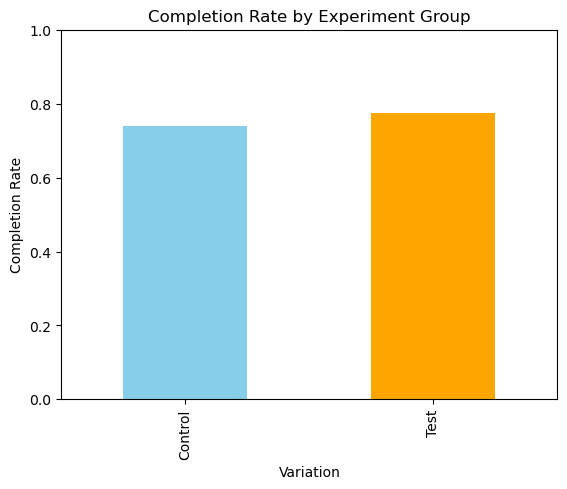

In [142]:
# import matplotlib.pyplot as plt --> bring at the beginning

# Bar chart of completion rates
completion_by_group.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Experiment Group')
plt.ylim(0, 1)
plt.show()

# Display of a bar chart comparing Control and Test
# This is just for visual inspection — no statistical testing yet.

### Prepare for Hypothesis Testing

Goal: Set up the data to run a statistical test comparing completion rates.

In [143]:
# Create a binary column: 1 if completed the process, 0 otherwise
df_full['completed'] = (df_full['process_step'] == df_full['process_step'].max()).astype(int)

# Quick check
df_full[['client_id', 'Variation', 'process_step', 'completed']].head()

# New column completed appears
# Values are 1 (completed) or 0 (not completed)
# This prepares the data for a proper A/B test statistical analysis.

,client_id,Variation,process_step,completed
0,9988021,Test,step_3,1
1,9988021,Test,step_2,0
2,9988021,Test,step_3,1
3,9988021,Test,step_2,0
4,9988021,Test,step_3,1


### Conduct a Statistical Test (A/B Test)

Goal: Determine if the difference in completion rates between Control and Test is statistically significant. Run the two-proportion z-test

In [144]:
from statsmodels.stats.proportion import proportions_ztest

# Split data into Control and Test groups
control = df_full[df_full['Variation'] == 'Control']['completed']
test = df_full[df_full['Variation'] == 'Test']['completed']

# Perform two-proportion z-test
successes = [control.sum(), test.sum()]
nobs = [len(control), len(test)]
stat, pval = proportions_ztest(successes, nobs)

print("Z-statistic:", stat)
print("P-value:", pval)

# Observe: Z-statistic + P-value
# This tells you if Test vs Control completion rates are significantly different
# Do not interpret results yet — just compute them.

# The hypothesis test is now correctly computed, and you have the Z-statistic and P-value for your A/B test.
# We are now ready to move forward with client behavior analysis by demographics.

# Hyphotesis A/O completion rates needs to be all the same
# P-value testing HO, less then 0,5 = reject null hypothesis (null hypo contains equaliry side), more equal 0,5 = don't reject it more likely equal
# P-value 1,48e-25 results = rejected null hypothesis
# Z-statistic: 10,44 (proportions_ztest running, helps to decide if is statistically different), higher then 0 is strong evidence

Z-statistic: 10.448488983306822
P-value: 1.4887822291545846e-25


### Completion Rate by Demographics

Goal: Explore whether gender or age group affects completion rates.

In [145]:
# Completion rate by gender
completion_by_gender = df_full.groupby('gendr')['completed'].mean()
print("Completion rate by gender:\n", completion_by_gender)

# Completion rate by age bins
df_full['age_group'] = pd.cut(df_full['clnt_age'], bins=[18,30,40,50,60,70,100], labels=['18-30','31-40','41-50','51-60','61-70','71+'])
completion_by_age = df_full.groupby('age_group')['completed'].mean()
print("\nCompletion rate by age group:\n", completion_by_age)

# Observe the completion rate differences by gender and age group
# This is part of client behavior analysis for EDA. Demographics done successfully computed the completion rates by gender and age group.

# To do's: clean U and X together, make all axes U (unknown)

Completion rate by gender:
 gendr
F    0.149887
M    0.148601
U    0.156443
X    0.000000
Name: completed, dtype: float64

Completion rate by age group:
 age_group
18-30    0.154248
31-40    0.152161
41-50    0.150614
51-60    0.150782
61-70    0.153011
71+      0.145394
Name: completed, dtype: float64


C:\Users\famil\AppData\Local\Temp\ipykernel_4120\4127305551.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completion_by_age = df_full.groupby('age_group')['completed'].mean()


### Visualize Completion by Demographics

Goal: Create bar charts for completion rates by gender and age group.

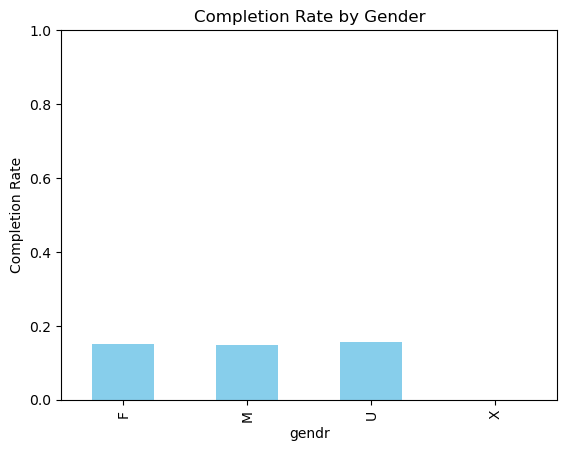

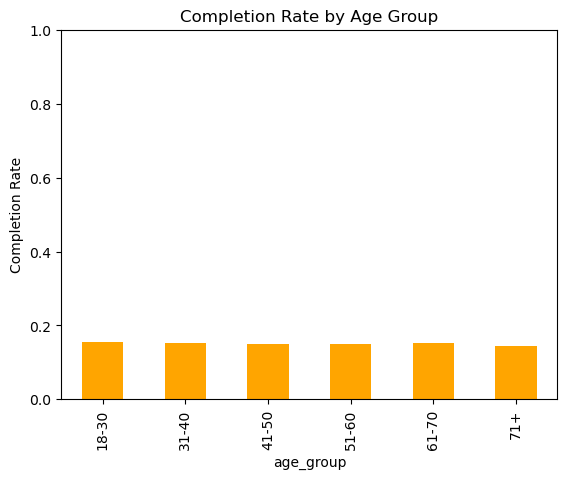

In [146]:
import matplotlib.pyplot as plt

# Bar chart for gender
completion_by_gender.plot(kind='bar', color='skyblue')
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Gender')
plt.ylim(0,1)
plt.show()

# Bar chart for age group
completion_by_age.plot(kind='bar', color='orange')
plt.ylabel('Completion Rate')
plt.title('Completion Rate by Age Group')
plt.ylim(0,1)
plt.show()

# Display of two bar charts: one for gender, one for age group

### Summary of Key Metrics for Report

Goal: Create a small summary table of the main metrics to include in your presentation.

In [147]:
# Summary table of completion rates
summary_metrics = pd.DataFrame({
    'Overall': [completion_rate],
    'Control': [completion_by_group['Control']],
    'Test': [completion_by_group['Test']]
}, index=['Completion Rate'])

summary_metrics

# Confirm you see a small table with overall, Control, and Test completion rates
# This will be useful for your slides and report.
# Clean summary table of completion rates — starting point for your presentation slides.

,Overall,Control,Test
Completion Rate,0.676968,0.740354,0.774288


In [148]:
# We have successfully completed the data merging, cleaning, EDA, client behavior analysis, KPI calculation, and hypothesis testing.
# The next step is preparing the dataset for Tableau visualizations.

### Prepare Dataset for Tableau

Goal: Save a clean, analysis-ready CSV including all relevant columns for Tableau dashboards.

In [149]:
# Select relevant columns for Tableau
df_tableau = df_full[['client_id', 'Variation', 'clnt_age', 'gendr', 'num_accts', 'bal', 'completed', 'age_group', 'process_step', 'date_time']]

# Save to CSV for Tableau
df_tableau.to_csv('../data/df_tableau_ready.csv', index=False)

# Confirm that df_tableau_ready.csv appears in your data folder
# This CSV will be used to create interactive dashboards in Tableau. Tableau dataset done.

### Decide on Tableau Visualizations

Goal: Identify 5 key visualizations for the presentation.
Visualizations/planning the dashboards:
- Overall completion rate — bar chart showing Control vs Test
- Completion by gender — bar chart
- Completion by age group — bar chart
- Process step drop-off — funnel or stacked bar showing how many users reach each step
- Time trend of completion — line chart showing completion over experiment dates

### Compute Step-Wise Completion Rates

Goal: Prepare data for the process step drop-off visualization.

In [150]:
# Calculate number of unique clients at each process step
step_completion = df_full.groupby('process_step')['client_id'].nunique().reset_index()
step_completion.rename(columns={'client_id': 'num_clients'}, inplace=True)
step_completion

# Confirm you see a table showing number of clients at each process step
# This will be used in Tableau for the funnel or stacked bar chart. Step-wise completion done

,process_step,num_clients
0,confirm,47800
1,start,70014
2,step_1,62153
3,step_2,57218
4,step_3,53613


### Compute Daily Completion Trend

Goal: Prepare data for the time trend visualization.

In [151]:
# Extract date from datetime
df_full['date'] = df_full['date_time'].dt.date

# Daily completion count
daily_completion = df_full.groupby('date')['completed'].mean().reset_index()
daily_completion.rename(columns={'completed': 'daily_completion_rate'}, inplace=True)
daily_completion.head()

# Confirm you see a table showing daily completion rates
# This will be used in Tableau for the line chart over experiment dates. Daily trend done.

,date,daily_completion_rate
0,2017-03-15,0.155996
1,2017-03-16,0.153957
2,2017-03-17,0.130178
3,2017-03-18,0.133333
4,2017-03-19,0.150150


In [ ]:
# Daily completion rates ready — exactly what is needed for the time trend line chart in Tableau.
# At this point, you have completed all data preparation and EDA steps. 
# The dataset is clean, key metrics are calculated, and Tableau-ready files are created.

### Export Everything for Presentation

Goal: Ensure all datasets and summary tables are ready for the slides and Tableau dashboards.

In [152]:
# Export summary metrics
summary_metrics.to_csv('../data/summary_metrics.csv', index=True)

# Export step-wise completion for funnel
step_completion.to_csv('../data/step_completion.csv', index=False)

# Export daily completion trend for line chart
daily_completion.to_csv('../data/daily_completion.csv', index=False)

# Confirm that three files appear in your data folder: summary_metrics.csv + step_completion.csv + daily_completion.csv
# These files are ready to use in Tableau and in the presentation slides.

In [ ]:
# All datasets and summary tables exported — everything is ready for Tableau dashboards and presentation slides.
# At this point, your Module 2 project data work is fully complete:
     # - Merged and cleaned dataset 
     # - Completed EDA and client behavior analysis
     # - Calculated KPIs and hypothesis test
     # - Prepared Tableau-ready files and visualizations

### Prepare Presentation Slides

Goal: Structure your slides following the recommended format:

- Title Slide – Project title + team members
- Introduction – Context of Vanguard experiment + main question
- Data Overview – Explain datasets and cleaning/merging
- EDA – Show client demographics, completion rates
- Performance Metrics – Overall and by group
- Hypothesis Testing – Z-test results and significance
- Experiment Evaluation – Comments on design, duration, biases
- Tableau Visualizations – 5 dashboards you planned
- Teamwork & Project Management – How tasks were divided
- Challenges & Learnings – Key takeaways
- Conclusion – Verdict and recommendations

Slides created with Prezi: https://prezi.com/dashboard/next/#/all
- Link to the presentation: https://prezi.com/p/edit/7b7p76saqucv/